In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from scipy import stats
from sklearn. metrics import roc_curve, auc
import numpy as np
import random
import matplotlib.pyplot as plt
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from sklearn.calibration import CalibrationDisplay
from sklearn. metrics import roc_curve, auc
from sklearn.metrics import accuracy_score

In [2]:
def calculate_metrics(y_true, y_pred):
    tp = np.sum(np.logical_and(y_true == 1, y_pred == 1))
    tn = np.sum(np.logical_and(y_true == 0, y_pred == 0))
    fp = np.sum(np.logical_and(y_true == 0, y_pred == 1))
    fn = np.sum(np.logical_and(y_true == 1, y_pred == 0))
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    ppv = tp / (tp + fp)
    npv = tn / (tn + fn)
    predictive_accuracy = (tp + tn) / (tp + tn + fp + fn)
    mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    return sensitivity, specificity, ppv, npv, predictive_accuracy, mcc

In [3]:
data = pd.read_excel("C:\\Users\\12292\\Desktop\\train size - xx (2).xlsx")

In [4]:
train_X = data.iloc[:, 1:]  # Features (excluding the first column)
train_y = data.iloc[:, 0] 

In [5]:
train_X

,BNF,PHASES,Radscore
0,1.260731,4,0.446201
1,1.385450,9,2.553235
2,1.410795,0,-1.116113
3,0.930106,0,-1.127136
4,1.066182,0,-1.669537
...,...,...,...
328,1.266495,1,-0.748227
329,1.018247,1,-1.270338
330,0.658511,5,0.754189
331,1.007611,6,-0.795665


In [6]:
data_test = pd.read_excel("C:\\Users\\12292\\Desktop\\test size - xx (2).xlsx")

In [7]:
test_y = data_test.iloc[:, 0] 

In [8]:
test_y

0      0
1      0
2      0
3      1
4      0
      ..
137    0
138    0
139    1
140    0
141    1
Name: status, Length: 142, dtype: int64

In [9]:
test_X = data_test.iloc[:, 1:] 

test_X

,BNF,PHASES,Radscore
0,1.599177,6,-0.199217
1,1.277627,4,0.417314
2,0.932445,1,-0.781816
3,0.956438,5,-0.183729
4,1.548727,3,-0.510796
...,...,...,...
137,1.190633,4,-1.118190
138,1.035633,0,-1.140353
139,1.178697,4,1.206319
140,1.069052,0,-1.283198


In [10]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [ ]:
#min_samples_split
#max_depth

In [18]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Set parameter grid
param_grid = {
    'min_samples_split': [25,30,35,40,45,50],
    'max_depth': [3, 4, 5, 7, 9]
}

# Create Gradient Boosting Classifier model
gbm = GradientBoostingClassifier(random_state=102030)

# Create grid search object
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=10, scoring='accuracy')

# Perform grid search using training data train_X and labels train_y
grid_search.fit(train_X, train_y)

# Output best parameters and best accuracy
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)

Best parameters found:  {'max_depth': 3, 'min_samples_split': 35}
Best accuracy found:  0.8109625668449197


In [ ]:
# Min_samples_leaf=50: This parameter can be intuitively set to prevent overfitting, 
# but when encountering imbalanced data, lower values can be considered

In [21]:
# Define the parameter grid, including min_samples_leaf
param_grid = {
    'min_samples_split': [35],
    'max_depth': [3],
    'min_samples_leaf': [20,25,30,35,40,45,50]
}

# Create a Gradient Boosting Classifier model
gbm = GradientBoostingClassifier(random_state=102030)

# Create a GridSearchCV object with the defined parameter grid, 10-fold cross-validation, and accuracy scoring
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=10, scoring='accuracy')

# Perform grid search using training data train_X and train_y
grid_search.fit(train_X, train_y)

# Output the best parameters found and the corresponding best accuracy score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)

Best parameters found:  {'max_depth': 3, 'min_samples_leaf': 20, 'min_samples_split': 35}
Best accuracy found:  0.807843137254902


In [ ]:
#max_features 

In [37]:
# Define the parameter grid, including max_features
param_grid = {
    'max_features': [ 2, 3, 4, 5]
}

# Update the model with the best parameters found so far
gbm = GradientBoostingClassifier(random_state=102030, max_depth=3, min_samples_leaf=20, min_samples_split=35)

# Create a GridSearchCV object with the updated parameter grid, 10-fold cross-validation, and accuracy scoring
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=10, scoring='accuracy')

# Perform grid search using training data train_X and labels train_y
grid_search.fit(train_X, train_y)

# Output the best parameters found and the corresponding best accuracy score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)


Best parameters found:  {'max_features': 2}
Best accuracy found:  0.8108734402852049


In [ ]:
# subsample

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid including subsample
param_grid = {
    'subsample': [0.5,0.6,0.7,0.8, 0.9, 1.0]
}

gbm = GradientBoostingClassifier(random_state=102030, max_depth=3, min_samples_leaf=20, min_samples_split=35,max_features=2)

# Create a GridSearchCV object with the updated parameter grid, 10-fold cross-validation, and accuracy scoring
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=10, scoring='accuracy')

# Perform grid search using training data train_X and labels train_y
grid_search.fit(train_X, train_y)

# Output the best parameters found and the corresponding best accuracy score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)


Best parameters found:  {'subsample': 0.9}
Best accuracy found:  0.813903743315508


In [ ]:
# learning_rate
# n_estimators

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.05,0.01,0.1],
    'n_estimators': [50, 100, 200, 300],
}

gbm = GradientBoostingClassifier(random_state=102030,subsample=0.9, max_depth=3, min_samples_leaf=20, min_samples_split=35)


grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=10, scoring='accuracy')


grid_search.fit(train_X, train_y)

print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)


Best parameters found:  {'learning_rate': 0.05, 'n_estimators': 100}
Best accuracy found:  0.8169340463458109


In [51]:
gbm = GradientBoostingClassifier(learning_rate= 0.05, n_estimators= 100,random_state=102030,subsample=0.9, max_depth=3, min_samples_leaf=20, min_samples_split=35)

In [52]:
clf_1_list = [
    (gbm, "GBM")
]

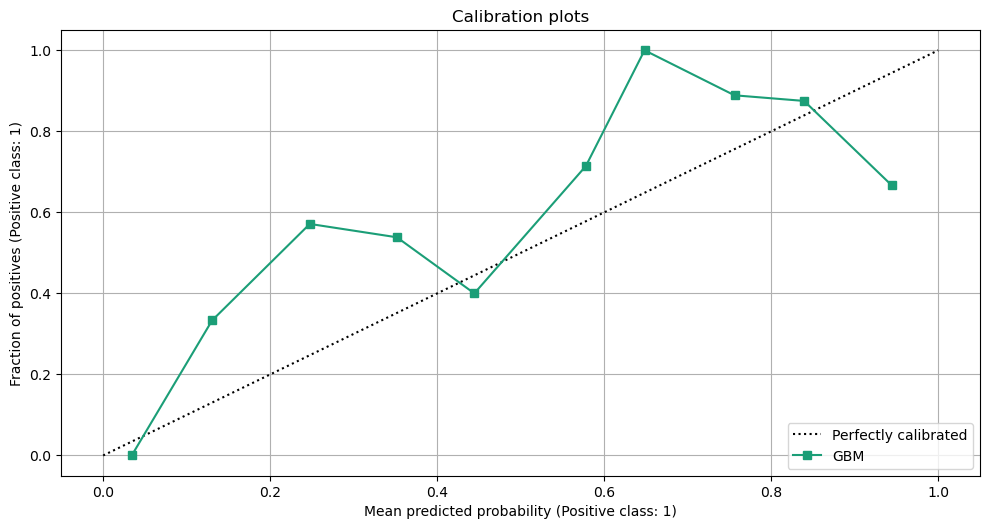

In [53]:
# Set random seed for both numpy and Python's random module
np.random.seed(321)
random.seed(321)

# Create figure and subplots
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.get_cmap("Dark2")

# Create subplot for calibration curves
ax_calibration_curve = fig.add_subplot(gs[:2, :2])
ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots")

# Combine two lists of classifiers
combined_clf_list = list(clf_1_list)  # Assuming clf_list and clf_1_list are lists of (classifier, name) tuples

# Plot calibration curve for each classifier
for i, (clf, name) in enumerate(combined_clf_list):
    clf.fit(train_X, train_y)  # Train the model
    display = CalibrationDisplay.from_estimator(
        clf,  # Use the classifier model
        test_X,
        test_y,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i % colors.N),  # Cycle through colors
    )

plt.tight_layout()
# plt.savefig("CalibrationPlots1.pdf")  # Save as PDF
plt.show()  # Display the plot


In [48]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid including learning_rate and n_estimators
param_grid = {
    'learning_rate': [0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01],
    'n_estimators': [100, 150,200,250, 300,350,400],
}

# Update the model with the best parameters found so far
gbm = GradientBoostingClassifier(random_state=102030,subsample=0.9, max_depth=3, min_samples_leaf=20, min_samples_split=35)

# Create a GridSearchCV object with the updated parameter grid, 10-fold cross-validation, and accuracy scoring
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=10, scoring='accuracy')

# Perform grid search using training data train_X and labels train_y
grid_search.fit(train_X, train_y)

# Output the best parameters found and the corresponding best accuracy score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)


Best parameters found:  {'learning_rate': 0.01, 'n_estimators': 350}
Best accuracy found:  0.8197860962566844


In [54]:
gbm = GradientBoostingClassifier(learning_rate= 0.01, n_estimators= 350,random_state=102030,subsample=0.9, max_depth=3, min_samples_leaf=20, min_samples_split=35)

In [55]:
clf_1_list = [
    (gbm, "GBM")
]

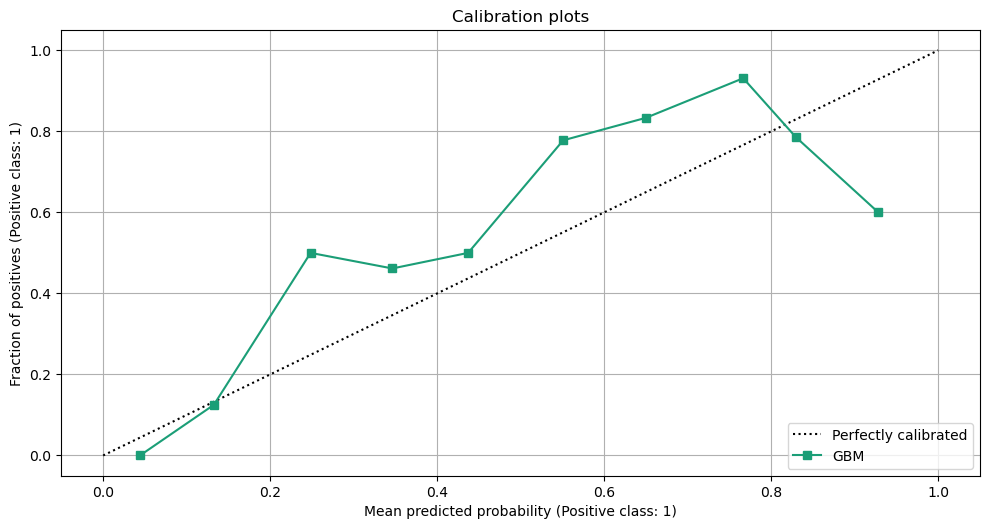

In [56]:
# Set random seed for both numpy and Python's random module
np.random.seed(321)
random.seed(321)

# Create figure and subplots
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.get_cmap("Dark2")

# Create subplot for calibration curves
ax_calibration_curve = fig.add_subplot(gs[:2, :2])
ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots")

# Combine two lists of classifiers
combined_clf_list = list(clf_1_list)  # Assuming clf_list and clf_1_list are lists of (classifier, name) tuples

# Plot calibration curve for each classifier
for i, (clf, name) in enumerate(combined_clf_list):
    clf.fit(train_X, train_y)  # Train the model
    display = CalibrationDisplay.from_estimator(
        clf,  # Use the classifier model
        test_X,
        test_y,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i % colors.N),  # Cycle through colors
    )

plt.tight_layout()
# plt.savefig("CalibrationPlots1.pdf")  # Save as PDF
plt.show()  # Display the plot


In [58]:
from sklearn.metrics import roc_auc_score

# Assuming grid_search is already fitted

# Predict probabilities on training set
train_probs = gbm.predict_proba(train_X)[:, 1]
train_auc = roc_auc_score(train_y, train_probs)

# Predict probabilities on test set
test_probs = gbm.predict_proba(test_X)[:, 1]
test_auc = roc_auc_score(test_y, test_probs)

# Output the AUC scores
print("AUC on training set: ", train_auc)
print("AUC on test set: ", test_auc)

AUC on training set:  0.9494550508375392
AUC on test set:  0.8904477611940299


In [59]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.003,0.004,0.005,0.006,0.007,0.008,0.009],
    'n_estimators': [240,260,280,300,320,340,360],
}

gbm = GradientBoostingClassifier(random_state=102030,subsample=0.9, max_depth=3, min_samples_leaf=20, min_samples_split=35)

grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=10, scoring='accuracy')

grid_search.fit(train_X, train_y)

print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)

Best parameters found:  {'learning_rate': 0.009, 'n_estimators': 360}
Best accuracy found:  0.8168449197860962


In [60]:
clf_1_list = [
    (gbm, "GBM")
]

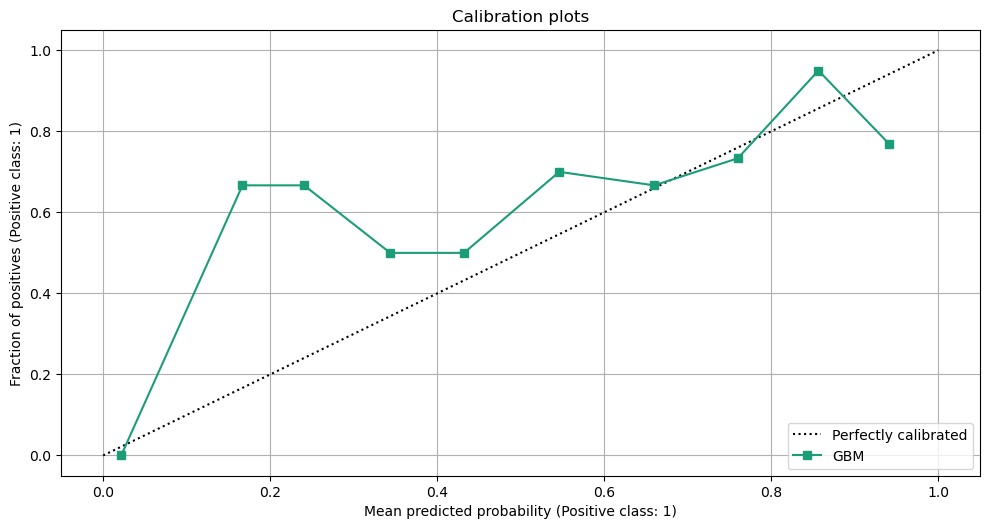

In [61]:
# Set random seed for both numpy and Python's random module
np.random.seed(321)
random.seed(321)

# Create figure and subplots
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.get_cmap("Dark2")

# Create subplot for calibration curves
ax_calibration_curve = fig.add_subplot(gs[:2, :2])
ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots")

# Combine two lists of classifiers
combined_clf_list = list(clf_1_list)  # Assuming clf_list and clf_1_list are lists of (classifier, name) tuples

# Plot calibration curve for each classifier
for i, (clf, name) in enumerate(combined_clf_list):
    clf.fit(train_X, train_y)  # Train the model
    display = CalibrationDisplay.from_estimator(
        clf,  # Use the classifier model
        test_X,
        test_y,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i % colors.N),  # Cycle through colors
    )

plt.tight_layout()
# plt.savefig("CalibrationPlots1.pdf")  # Save as PDF
plt.show()  # Display the plot


In [ ]:
# If you want to avoid overfitting, 
# you need to reduce the learning rate while reducing the number of n_estimators# 

In [62]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid including learning_rate and n_estimators, with subsample fixed at 0.9
param_grid = {
    'learning_rate': [0.003,0.004,0.005,0.006,],
    'n_estimators': [260,270,280,290,300,],
}

# Update the model with the best parameters found so far
gbm = GradientBoostingClassifier(random_state=102030,subsample=0.9, max_depth=3, min_samples_leaf=20, min_samples_split=35)

# Create a GridSearchCV object with the updated parameter grid, 10-fold cross-validation, and accuracy scoring
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=10, scoring='accuracy')

# Perform grid search using training data train_X and train_y
grid_search.fit(train_X, train_y)

# Output the best parameters found and the corresponding best accuracy score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)

Best parameters found:  {'learning_rate': 0.005, 'n_estimators': 260}
Best accuracy found:  0.8137254901960784


In [63]:
clf_1_list = [
    (gbm, "GBM")
]

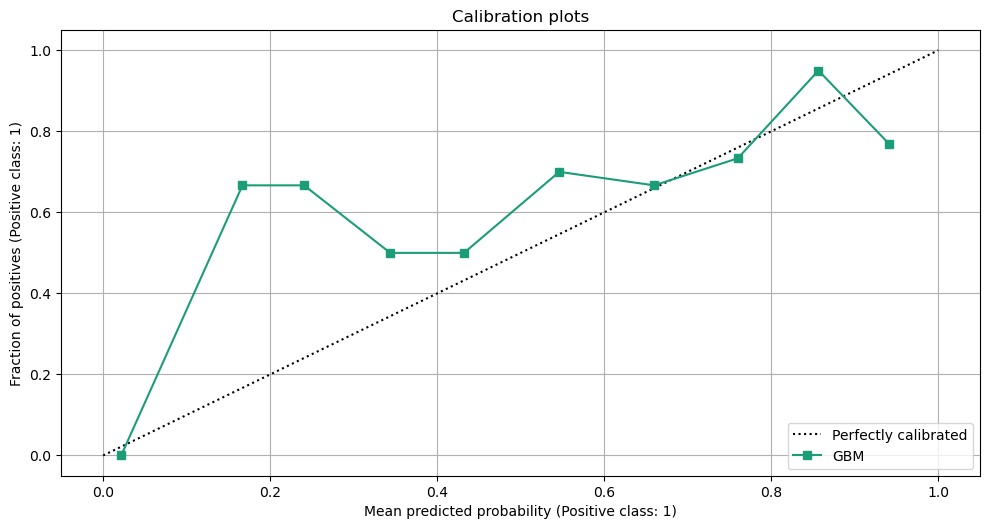

In [64]:
np.random.seed(321)
random.seed(321)

# Create figure and subplots
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.get_cmap("Dark2")

# Create subplot for calibration curves
ax_calibration_curve = fig.add_subplot(gs[:2, :2])
ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots")

# Combine two lists of classifiers
combined_clf_list = list(clf_1_list)  # Assuming clf_list and clf_1_list are lists of (classifier, name) tuples

# Plot calibration curve for each classifier
for i, (clf, name) in enumerate(combined_clf_list):
    clf.fit(train_X, train_y)  # Train the model
    display = CalibrationDisplay.from_estimator(
        clf,  # Use the classifier model
        test_X,
        test_y,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i % colors.N),  # Cycle through colors
    )

plt.tight_layout()
# plt.savefig("CalibrationPlots1.pdf")  # Save as PDF
plt.show()  # Display the plot


In [ ]:
#..........

In [231]:
    best_GB = GradientBoostingClassifier(learning_rate=0.008,  
                                           n_estimators=251,  
                                           min_samples_split=32,  
                                           min_samples_leaf=3,  
                                           max_depth=3,  
                                           max_features=3,  
                                           subsample=0.7,  
                                           random_state=321)  
      
    best_GB.fit(train_X, train_y)  

GradientBoostingClassifier(learning_rate=0.008, max_features=3,
                           min_samples_leaf=3, min_samples_split=32,
                           n_estimators=251, random_state=321, subsample=0.7)

In [232]:
clf_1_list = [
    (best_GB, "GBM")
]

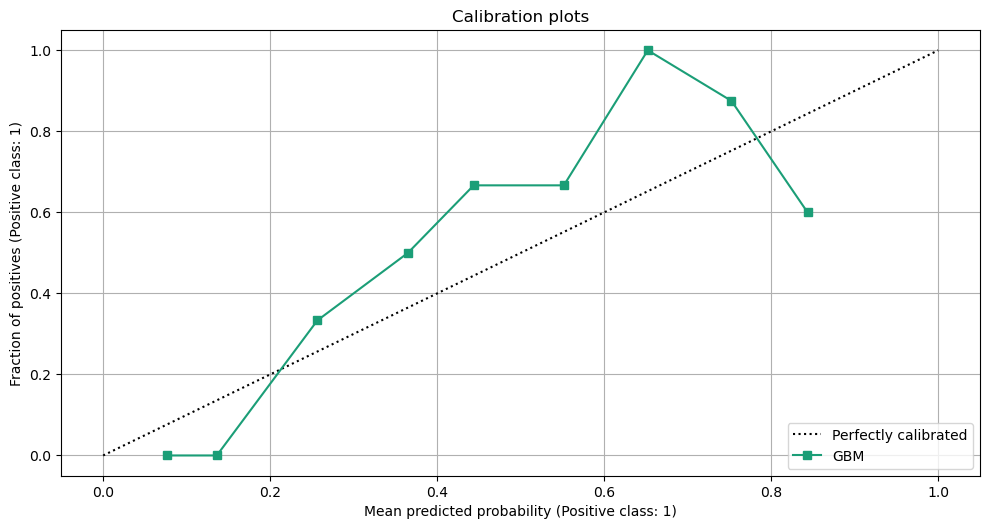

In [233]:
# Set random seed for both numpy and Python's random module
np.random.seed(321)
random.seed(321)

# Create figure and subplots
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.get_cmap("Dark2")

# Create subplot for calibration curves
ax_calibration_curve = fig.add_subplot(gs[:2, :2])
ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots")

# Combine two lists of classifiers
combined_clf_list = list(clf_1_list)  # Assuming clf_list and clf_1_list are lists of (classifier, name) tuples

# Plot calibration curve for each classifier
for i, (clf, name) in enumerate(combined_clf_list):
    clf.fit(train_X, train_y)  # Train the model
    display = CalibrationDisplay.from_estimator(
        clf,  # Use the classifier model
        test_X,
        test_y,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i % colors.N),  # Cycle through colors
    )

plt.tight_layout()
# plt.savefig("CalibrationPlots1.pdf")  # Save as PDF
plt.show()  # Display the plot


In [ ]:
#..........

In [ ]:
# After multiple rounds of adjustments, 
# the final model will have an aesthetically pleasing calibration curve, 
# with other metrics falling within acceptable ranges. 
# There will certainly be other optimal hyperparameters, 
# but due to time constraints, achieving a satisfactory result is sufficient.

In [ ]:
# In our study, we selected the following hyperparameters to build the GBM model, 

In [590]:
#Here is the final model.

from sklearn.ensemble import GradientBoostingClassifier
#Random_state will affect the ROC and caliberation curve.
best_GB = GradientBoostingClassifier(learning_rate=0.005,
                                     n_estimators=278,
                                     min_samples_split=38,
                                     min_samples_leaf=27,
                                     max_depth=3,
                                     max_features=2,
                                     subsample=0.7,
                                     random_state=102030)

best_GB.fit(train_X, train_y)

GradientBoostingClassifier(learning_rate=0.005, max_features=2,
                           min_samples_leaf=27, min_samples_split=38,
                           n_estimators=278, random_state=102030,
                           subsample=0.7)

In [591]:
test_gb_pred_proba = best_GB.predict_proba(test_X)[:, 1]
test_auc = roc_auc_score(test_y, test_gb_pred_proba)
GBboost_y_pred=best_GB.predict(test_X)
print("testAUC:", test_auc)
fprgb,tprgb,threshold = roc_curve(test_y,test_gb_pred_proba)
auc(fprgb,tprgb)

testAUC: 0.8906467661691542


0.8906467661691542

In [592]:
GBboost_train_y_pred=best_GB.predict(train_X)
train_GB_pred_proba = best_GB.predict_proba(train_X)[:, 1]
train_auc = roc_auc_score(train_y, train_GB_pred_proba)
print("Training AUC:", train_auc )

Training AUC: 0.9233230926779313


In [593]:
import numpy as np  
from scipy.stats import chi2_contingency  

def hosmer_lemeshow_test(test_y, GBboost_y_pred , num_groups=10):  
    # Sort the data based on predicted probabilities  
    sorted_indices = np.argsort( GBboost_y_pred )  
    sorted_y = test_y[sorted_indices]  
    
    # Create groups based on the sorted indices  
    group_size = len(sorted_y) // num_groups  
    group_bounds = np.arange(0, len(sorted_y) + 1, group_size)  
    
    # Calculate observed and expected counts for each group  
    observed_counts = np.zeros(num_groups)  
    expected_counts = np.zeros(num_groups)  
    
    total_positive = np.sum(sorted_y)  
    total_negative = len(sorted_y) - total_positive  
    
    for i in range(num_groups):  
        start, end = group_bounds[i], group_bounds[i + 1]  
        observed_counts[i] = np.sum(sorted_y[start:end])  
        expected_counts[i] = (end - start) * total_positive / len(sorted_y)  
        
    # Perform chi-squared test  
    chi2, p = chi2_contingency(np.array([observed_counts, expected_counts]).T)[:2]  
    
    dof = num_groups - 2  # Degrees of freedom for chi-squared test
      
    return chi2, p, dof  

chi2, p_value, dof = hosmer_lemeshow_test(test_y, GBboost_y_pred )  
print(f"Chi-squared: {chi2}")  
print(f"P-value: {p_value}")  
print(f"Degrees of freedom: {dof}")

# Determine model calibration based on p-value
if p_value < 0.05:
    print("Poor model calibration")
else:
    print("Well-calibrated model")

Chi-squared: 13.931517965112386
P-value: 0.12478220479239868
Degrees of freedom: 8
Well-calibrated model


In [594]:
clf_1_list = [
    (best_GB, "best_GB")
]

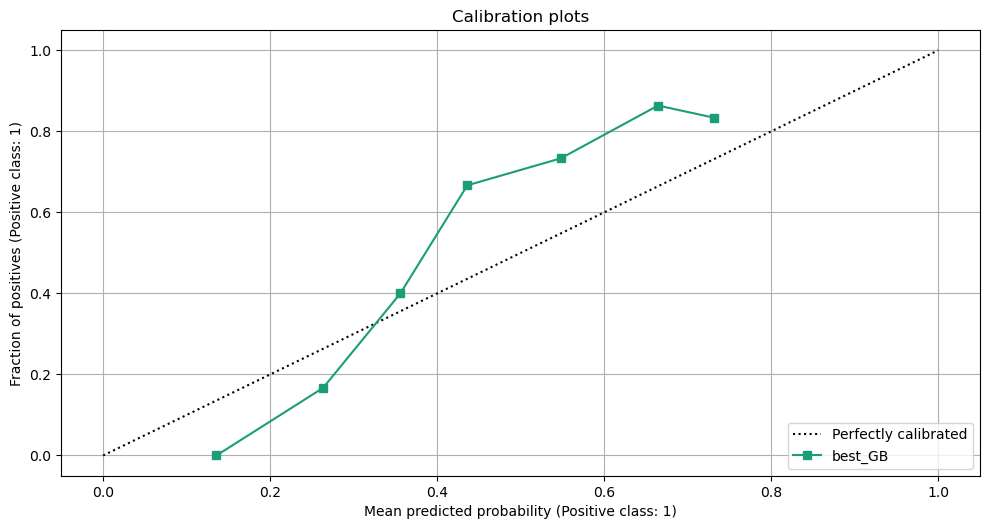

In [595]:
# Set random seed for both numpy and Python's random module
np.random.seed(321)
random.seed(321)

# Create figure and subplots
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.get_cmap("Dark2")

# Create subplot for calibration curves
ax_calibration_curve = fig.add_subplot(gs[:2, :2])
ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots")

# Combine two lists of classifiers
combined_clf_list = list(clf_1_list)  # Assuming clf_list and clf_1_list are lists of (classifier, name) tuples

# Plot calibration curve for each classifier
for i, (clf, name) in enumerate(combined_clf_list):
    clf.fit(train_X, train_y)  # Train the model
    display = CalibrationDisplay.from_estimator(
        clf,  # Use the classifier model
        test_X,
        test_y,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i % colors.N),  # Cycle through colors
    )

plt.tight_layout()
# plt.savefig("CalibrationPlots1.pdf")  # Save as PDF
plt.show()  # Display the plot


In [596]:
# Calculate metrics for the training set and the testing set.
sensitivity_train, specificity_train, ppv_train, npv_train, predictive_accuracy_train, mcc_train = calculate_metrics(train_y,GBboost_train_y_pred)
sensitivity_test, specificity_test, ppv_test, npv_test, predictive_accuracy_test, mcc_test = calculate_metrics(test_y,GBboost_y_pred)

# ptint
print("Train Set Metrics:")
print(f"Sensitivity: {sensitivity_train:.4f}")
print(f"Specificity: {specificity_train:.4f}")
print(f"PPV (Precision): {ppv_train:.4f}")
print(f"NPV: {npv_train:.4f}")
print(f"Predictive Accuracy: {predictive_accuracy_train:.4f}")
print(f"MCC: {mcc_train:.4f}")

print("\nTest Set Metrics:")
print(f"Sensitivity: {sensitivity_test:.4f}")
print(f"Specificity: {specificity_test:.4f}")
print(f"PPV (Precision): {ppv_test:.3f}")
print(f"NPV: {npv_test:.4f}")
print(f"Predictive Accuracy: {predictive_accuracy_test:.4f}")
print(f"MCC: {mcc_test:.4f}")

Train Set Metrics:
Sensitivity: 0.8367
Specificity: 0.8495
PPV (Precision): 0.8146
NPV: 0.8681
Predictive Accuracy: 0.8438
MCC: 0.6844

Test Set Metrics:
Sensitivity: 0.7463
Specificity: 0.8533
PPV (Precision): 0.820
NPV: 0.7901
Predictive Accuracy: 0.8028
MCC: 0.6047


In [597]:
y_pred =GBboost_y_pred

Model: best_GB, Trained model: GradientBoostingClassifier(learning_rate=0.005, max_features=2,
                           min_samples_leaf=27, min_samples_split=38,
                           n_estimators=278, random_state=102030,
                           subsample=0.7)


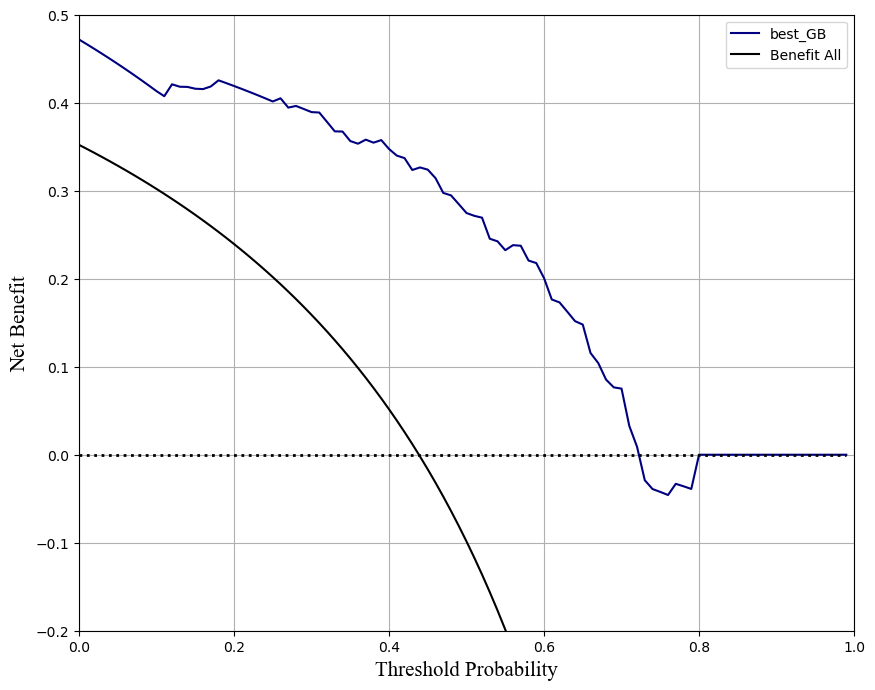

In [598]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
plt.figure(figsize=(10, 8))
np.random.seed(321)
random.seed(321)
 
models = [
    ("best_GB", best_GB)
]

def net_benefit_model(test_y,y_prob,thresh_group):
    total = test_y.shape[0]
    net_model = np.array([])
    for thresh in thresh_group:
        y_pred = y_prob > thresh
        tn, fp, fn, tp = confusion_matrix(test_y,y_pred).ravel()
        net_benefit = tp/total-fp/total*(thresh/(1-thresh))
        net_model = np.append(net_model,net_benefit)
    return net_model
 
def net_benefit_all(test_y,thresh_group):
    tn, fp, fn, tp = confusion_matrix(test_y,y_pred).ravel()
    total = test_y.shape[0]
    net_all = np.array([])
    for thresh in thresh_group:
        net_benefit = (tp)/total - (tn)/total*(thresh/(1-thresh))
        net_all = np.append(net_all, net_benefit)
    return net_all
 
thresh_group = []
for i in range(0,100,1):
    thresh = i/100
    thresh_group.append(thresh)
 
color = ["navy", "darkorange", "red", "green", "pink", "blue", "purple", "yellow", "cyan", "magenta", "brown", "olive", "teal"]
a = 0
benefit_all = net_benefit_all(test_y,thresh_group)
benefit_models = []
y2 = np.maximum(benefit_all, 0)
plt.xlim(0,1)
 
for name, model in models:
    clf = model.fit(train_X, train_y)
    print(f"Model: {name}, Trained model: {clf}")
    y_prob = clf.predict_proba(test_X)[:, 1]
    benefit_model = net_benefit_model(test_y, y_prob, thresh_group)
    plt.plot(thresh_group, benefit_model, color=color[a], label=name)
    a += 1
    benefit_models.append(benefit_model)

 
plt.plot(thresh_group, benefit_all, color='black', label='Benefit All')
plt.plot(thresh_group, np.zeros(len(thresh_group)), color='k', lw=2, linestyle=':')

plt.ylim(-0.2, 0.5)  # Adjusts the y-axis range
plt.xlabel('Threshold Probability', fontdict={'family': 'Times New Roman', 'fontsize': 15})
plt.ylabel('Net Benefit', fontdict={'family': 'Times New Roman', 'fontsize': 15})

plt.grid('major')

# Get the current axes, allowing access to the spines
#ax = plt.gca()

# Set spine colors
#ax.spines['right'].set_color((0.8, 0.8, 0.8))
#ax.spines['top'].set_color((0.8, 0.8, 0.8))

plt.legend(loc='upper right')

# To save the plot as a PDF
#plt.savefig('C:/Users/12292/Desktop/myplo1t.pdf', format='pdf')

plt.show()